In [2]:
# wistria で解析するためのノートブック
import numpy as np
from numpy.linalg.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.markers import MarkerStyle
import cartopy.crs as ccrs
import cartopy.feature as cfeaturel
import pandas as pd

# データの読み込み 
data_dir = '/work/gi55/i55233/data/machine_learning/results/kikuchi-8vals_v1/cor/7vals/'
lt_max = 35
val_box = ['olr', 'u850', 'v850', 'u200', 'v200', 'h850', 'pr_wtr', 'sst']
val_nm = np.arange(8)
pred = []
sup = []
for lt in range(0, lt_max+1, 5):
    pred_i = []
    sup_i = []
    for seed in range(0, 10):
        lt_i = data_dir + f'wo_{val_box[7]}/{(lt):03}day/seed{(seed):03}.npz'
        df_i = np.load(lt_i)
        pred_i.append(df_i['arr_0'][:-1-(lt_max-lt)])
        sup_i.append(df_i['arr_1'][:-1-(lt_max-lt)])
    pred.append(pred_i)
    sup.append(sup_i)
pred = np.array(pred)
sup  = np.array(sup)
print(pred.shape, sup.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/work/gi55/i55233/data/machine_learning/results/kikuchi-8vals_v1/cor/7vals/wo_sst/020day/seed001.npz'

In [54]:
# 相関係数の計算
def culc_cor(test_data, pred_data):
    j = 0
    cor = (np.sum(pred_data[:,2*j] * test_data[:,2*j], axis=0) + np.sum(pred_data[:,2*j+1] * test_data[:,2*j+1], axis=0)) / \
            (np.sqrt(np.sum(pred_data[:,2*j] ** 2 + pred_data[:,2*j+1] ** 2, axis=0)) * np.sqrt(np.sum(test_data[:,2*j] ** 2 + test_data[:,2*j+1] ** 2, axis=0)))
    #print('cor : = ', cor)
    return cor

In [61]:
cor = np.zeros((len(pred),len(pred[0]),5))
rt = pd.date_range('2015-01-01', periods=len(pred[0,0,:,0]), freq='D')    # real time のインデックスは'与えるデータの初期時刻'で定めておく

jja = rt.month.isin([6, 7, 8])
djf = rt.month.isin([12, 1, 2])
mjjaso = rt.month.isin([5, 6, 7, 8, 9, 10])
ndjfma = rt.month.isin([11, 12, 1, 2, 3, 4])
pred_jja     = pred[:,:,jja]
pred_djf     = pred[:,:,djf]
pred_mjjaso  = pred[:,:,mjjaso]
pred_ndjfma  = pred[:,:,ndjfma]
sup_jja      = sup[:,:,jja]
sup_djf      = sup[:,:,djf]
sup_mjjaso   = sup[:,:,mjjaso]
sup_ndjfma   = sup[:,:,ndjfma]
for i in range(len(pred)):
    for j in range(len(pred[i])):

        cor[i,j,0]   = culc_cor(sup_jja[i,j], pred_jja[i,j])
        cor[i,j,1]   = culc_cor(sup_djf[i,j], pred_djf[i,j])
        cor[i,j,2]   = culc_cor(sup_mjjaso[i,j], pred_mjjaso[i,j])
        cor[i,j,3]   = culc_cor(sup_ndjfma[i,j], pred_ndjfma[i,j])
        cor[i,j,4]   = culc_cor(sup[i,j], pred[i,j])
print('jja, djf, mjjaso, ndjfma, all')
print(cor[:,:,0])
print(cor.shape)
print(pred.shape, pred_jja.shape)

jja, djf, mjjaso, ndjfma, all
[[ 0.99706938  0.99545804 -0.04604996  0.99377318  0.69019013  0.68407497
   0.68945597  0.99623911  0.68718768 -0.04061323  0.0278168   0.99552268
  -0.03920215  0.99823431 -0.04407079  0.6863674   0.99765739  0.68925112
   0.99791194  0.9982278 ]
 [ 0.67699995  0.96873218 -0.01758382  0.0397972  -0.04472608  0.04642875
  -0.04696131  0.97029559  0.01121256 -0.01804723 -0.03719461  0.67038206
   0.67646192  0.96897217 -0.04696252  0.96732302  0.9695729  -0.0057996
   0.66860712  0.67292042]
 [ 0.88810401 -0.04179879 -0.00254343  0.8888128   0.62650622  0.62465377
   0.6211192   0.88783024  0.028782    0.61503611  0.01543363  0.59725516
   0.89083561  0.90100883 -0.0448567   0.89834081  0.88343214  0.62575753
   0.61662197  0.88171979]
 [ 0.73741367  0.47367674  0.01308163  0.75408191  0.73447183  0.03029703
  -0.02820625  0.75466831  0.03271751  0.72768022 -0.01734865  0.03791762
   0.74063871  0.73948812  0.03847558  0.02154378  0.7644629   0.75505434
  

In [62]:
# ベストスコアのモデルのみ抽出
best = np.argmax(cor[:,:,4], axis=1)
print(best.shape)
best_cor = np.zeros((len(best),5))
for i in range(len(best)):
    best_cor[i,:] = cor[i,best[i],:]
    
print('jja, djf, mjjaso, ndjfma, all')
print('best menber = ', best)
print(best_cor[:,0])

(5,)
jja, djf, mjjaso, ndjfma, all
best menber =  [13  7 13 16 13]
[0.99823431 0.97029559 0.90100883 0.7644629  0.67950856]


In [5]:
# ensemble mean
high = [0.9, 0.9, 0.9, 0.9, 0.9, 
        0.8, 0.8, 0.8, 0.8, 0.8, 
        0.7, 0.7, 0.6, 0.6, 0.6,
        0.6, 0.6, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.2,
        0.2]
# lead time ごとに上の閾値を超えるモデルの数をカウント
esm_all    = np.zeros((pred.shape))
esm_jja    = np.zeros((pred_jja.shape))
esm_djf    = np.zeros((pred_djf.shape))
esm_mjjaso = np.zeros((pred_mjjaso.shape))
esm_ndjfma = np.zeros((pred_ndjfma.shape))

for i in range(lt_max+1):
    for j in range(20):
        esm_all[i,j,:,:]    = np.where(cor[i,j,4] > high[i], pred[i,j,:,:], np.nan)
        esm_jja[i,j,:,:]    = np.where(cor[i,j,4] > high[i], pred_jja[i,j,:,:], np.nan)
        esm_djf[i,j,:,:]    = np.where(cor[i,j,4] > high[i], pred_djf[i,j,:,:], np.nan)
        esm_mjjaso[i,j,:,:] = np.where(cor[i,j,4] > high[i], pred_mjjaso[i,j,:,:], np.nan)
        esm_ndjfma[i,j,:,:] = np.where(cor[i,j,4] > high[i], pred_ndjfma[i,j,:,:], np.nan)
print('esm_all    : ', esm_all.shape)
print('esm_jja    : ', esm_jja.shape)
print('esm_djf    : ', esm_djf.shape)
print('esm_mjjaso : ', esm_mjjaso.shape)
print('esm_ndjfma : ', esm_ndjfma.shape)

#　ensemble のカウント
print('esm_menber = ', np.count_nonzero(~np.isnan(esm_all[:,:,0,0]), axis=1))

esm_all    :  (36, 20, 2520, 2)
esm_jja    :  (36, 20, 644, 2)
esm_djf    :  (36, 20, 601, 2)
esm_mjjaso :  (36, 20, 1288, 2)
esm_ndjfma :  (36, 20, 1232, 2)
esm_menber =  [ 9  8  8  9  7  7  7  7  5  4  5  5  5  7  9  7  6  8  7  9 10  8  9  9
  8  5  7 11 11  8  8  6  3  4  6  9]


In [6]:
# nan 以外のデータで平均をとる
esm_all_mean = np.nanmean(esm_all, axis=1)
esm_jja_mean = np.nanmean(esm_jja, axis=1)
esm_djf_mean = np.nanmean(esm_djf, axis=1)
esm_mjjaso_mean = np.nanmean(esm_mjjaso, axis=1)
esm_ndjfma_mean = np.nanmean(esm_ndjfma, axis=1)

esm_cor = np.zeros((lt_max+1, 5))

for i in range(len(pred)):
    esm_cor[i,0]   = culc_cor(sup_jja[i,0], esm_jja_mean[i])
    esm_cor[i,1]   = culc_cor(sup_djf[i,0], esm_djf_mean[i])
    esm_cor[i,2]   = culc_cor(sup_mjjaso[i,0], esm_mjjaso_mean[i])
    esm_cor[i,3]   = culc_cor(sup_ndjfma[i,0], esm_ndjfma_mean[i])
    esm_cor[i,4]   = culc_cor(sup[i,0], esm_all_mean[i])
print('jja, djf, mjjaso, ndjfma, all')
#print(esm_cor)


jja, djf, mjjaso, ndjfma, all


In [95]:
x_month = np.arange(1, 13)
print(x_month)
plt.figure(figsize=(6, 6))
for j in range(lt_max+1):
    plt.plot(x_month, cor_mm[j,:], color='b', alpha=1/(j*.3+1))
plt.colorbar()  
plt.ylim(0.0,1.0)
plt.xlim(1,12)
plt.xlabel('month')
plt.ylabel('corr')
plt.legend()

[ 1  2  3  4  5  6  7  8  9 10 11 12]


NameError: name 'cor_mm' is not defined

<Figure size 600x600 with 0 Axes>

In [8]:
nicam_bsiso = np.array([
    [0.6145144, 0.9919250],
    [0.1220745, 0.9920530],
    [1.3663927, 0.9862836],
    [2.1182138, 0.9798000],
    [2.8703655, 0.9781713],
    [3.6222251, 0.9722551],
    [4.3740378, 0.9656494],
    [5.1258372, 0.9588480],
    [5.8775442, 0.9506906],
    [6.6293278, 0.9436571],
    [7.3810713, 0.9360362],
    [8.1326835, 0.9264866],
    [8.8840872, 0.9138771],
    [9.6354934, 0.9013038],
    [10.3868744, 0.888360],
    [11.1382741, 0.875693],
    [11.8897835, 0.864635],
    [12.6411853, 0.8519968],
    [13.3922926, 0.8350366],
    [14.1431426, 0.8142987],
    [14.8939842, 0.7934375],
    [15.6448970, 0.7736204],
    [16.3958043, 0.7537236],
    [17.1467724, 0.7347187],
    [17.8979889, 0.7193610],
    [18.6494207, 0.7071647],
    [19.4007518, 0.6934893],
    [20.1520385, 0.6791613],
    [20.9035726, 0.6684660],
    [21.6550534, 0.6569876],
    [22.4061780, 0.6402813],
    [23.1569510, 0.6184123],
    [23.9078067, 0.5977576],
    [24.7032303, 0.5829329],
    [25.4095400, 0.5567711],
    [26.1602745, 0.5343365],
    [26.8743596, 0.5125842],
    [27.4597305, 0.4867337],
    [28.0817463, 0.4601367],
    [28.7504060, 0.4449050]
])

# MJO skill scores of NICAM (Miyakawa+13)
# 2008-2012年の各１１月～３月の結果
# 水平解像度は１４km
nicam_mjo = np.array([
    [1.5462208206076005, 0.9812175237750825],
    [2.471175961112099, 0.9650189502864384],
    [3.3961311016165974, 0.9537185887268789],
    [4.321086242121097, 0.9398692413707002],
    [5.246041382625594, 0.9295024036275322],
    [6.170996523130094, 0.9149337246728477],
    [7.095951663634593, 0.8964731763992999],
    [8.020906804139091, 0.8851075403353617],
    [8.945861944643589, 0.8751195571276585],
    [9.870817085148087, 0.8573822766036338],
    [10.795772225652588, 0.8371307796169803],
    [11.720727366157085, 0.8184980247364029],
    [12.645682506661583, 0.81384844634661],
    [13.570637647166084, 0.8121263802763163],
    [14.495592787670581, 0.8023794863184543],
    [15.420547928175079, 0.7860198586506645],
    [16.34550306867958, 0.7703834987323981],
    [17.270458209184078, 0.7581568296333131],
    [18.195413349688575, 0.7461023671412574],
    [19.120368490193073, 0.7353222335412192],
    [20.045323630697574, 0.714760764661913],
    [20.97027877120207, 0.6907896049634251],
    [21.89523391170657, 0.6809566077020484],
    [22.82018905221107, 0.6907617259437944],
    [23.745144192715568, 0.6886890144203301],
    [24.670099333220065, 0.6651652618374555],
    [25.595054473724563, 0.6313622529216377],
    [26.520009614229064, 0.6115917863906195],
    [27.490868235651895, 0.592994267631173],
    [28.369919895238063, 0.5541756981814071],
    [29.25011914184718, 0.4856055535449536],
    [30.130318388456303, 0.43786084747740284],
])

cnn_mjo_21 = np.array([
    [0.9817082738445713, 0.9824670106784643],
    [1.8961625282167098, 0.9654576856649395],
    [2.7404032134029563, 0.9458823584666316],
    [4.058917566053893,  0.9159698341007744],
    [5.377431918704826,  0.8828657680238624],
    [6.6959462713557585, 0.8525494841943445],
    [8.014460624006688,  0.8187080974866132],
    [9.33297497665762,   0.7826146429140359],
    [10.651489329308554, 0.7519057673755503],
    [11.970003681959486, 0.7170202900799462],
    [13.28851803461042,  0.6849617715643450],
    [14.607032387261352, 0.6515013717127321],
    [15.925546739912292, 0.6141924330313733],
    [17.24406109256322,  0.5711564279686858],
    [18.542841582951638, 0.5365626357353309],
    [19.88108979786508,  0.4949488859504941],
    [21.199604150516016, 0.4658227795989799],
    [22.518118503166953, 0.4384730456678053],
    [23.836632855817882, 0.4110432949609396],
    [25.15514720846882,  0.3835975408989357],
    [26.473661561119748, 0.3576561022199221],
    [27.792175913770684, 0.3314426065035594],
    [29.110690266421614, 0.3052611174974726],
    [30.42920461907255,  0.2796877559866378],
    [31.74771897172348,  0.2555546964382406],
    [33.066233324374416, 0.2313576234692900],
    [34.38474767702535,  0.2070005169489576],
    [35.10832262665086,  0.1950780173710027]
])
cnn_mjo_24 = np.array([
    [1.11, 0.969],
    [2.08, 0.958],
    [2.78, 0.950],
    [3.47, 0.941],
    [4.16, 0.932],
    [4.66, 0.925],
    [5.98, 0.905],
    [6.67, 0.895],
    [7.36, 0.885],
    [8.06, 0.872],
    [8.75, 0.860],
    [9.38, 0.848],
    [9.85, 0.838],
    [11.0, 0.810],
    [11.7, 0.795],
    [12.4, 0.782],
    [13.1, 0.767],
    [13.8, 0.750],
    [14.3, 0.739],
    [15.4, 0.719],
    [16.0, 0.704],
    [16.7, 0.691],
    [17.4, 0.677],
    [18.1, 0.662],
    [18.8, 0.645],
    [19.4, 0.631],
    [20.0, 0.619],
    [20.6, 0.600],
    [21.3, 0.587],
    [22.0, 0.572],
    [22.7, 0.554],
    [23.4, 0.538],
    [24.0, 0.526],
    [24.7, 0.512],
    [25.5, 0.500],
    [26.2, 0.486],
    [26.8, 0.473],
    [27.5, 0.454],
    [28.2, 0.438],
    [28.9, 0.430],
    [29.5, 0.414],
    [30.4, 0.385]
])
cnn_bp = np.array([
    [0,  0.9925489267970012],
    [2,  0.9921619014788010],
    [4,  0.9917982369942809],
    [6,  0.9876011011358417],
    [8,  0.9833260673707259],
    [10, 0.9730582619096018],
    [15, 0.9177067088356041],
    [20, 0.8716005416467286],
    [25, 0.8185876235392283],
    [30, 0.7388985175180534],
    [35, 0.5458392483160485],
    [40, 0.4060880564285142]

])

best_cor_jja = np.array([0.99831948, 0.99627569, 0.99235335, 0.9863621 , 0.97982805, 0.97341921,
                         0.9609304 , 0.94599168, 0.92610699, 0.9165462 , 0.89537585, 0.88102112,
                         0.84270496, 0.82904516, 0.78928163, 0.78999127, 0.76686247, 0.7468345,
                         0.72166382, 0.71548538, 0.7095996 , 0.65252432, 0.66526616, 0.64957677,
                         0.62409131, 0.61395717, 0.57208162, 0.56384285, 0.55236026, 0.51091553,
                         0.47242676, 0.45889078, 0.49640936, 0.45346572, 0.40012588, 0.40285067])

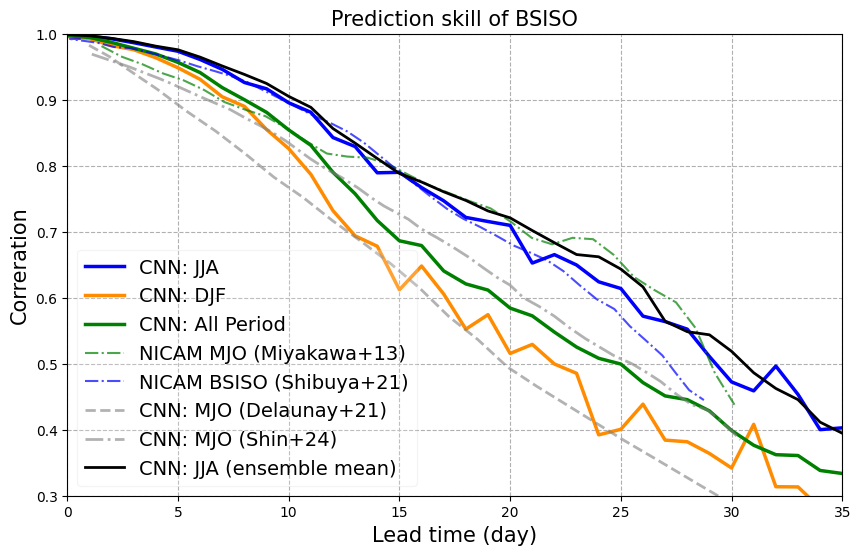

In [8]:
# リードタイムごとの予測スキルの比較
label_box = ['CNN: JJA', 'CNN: DJF', 'CNN: mjjaso', 'CNN: ndjfma', 'CNN: All Period']
lead_time = np.arange(0, len(cor))
plt.figure(figsize=(10,6))
# cnn model
plt.plot(lead_time, best_cor[:,0], label=label_box[0], color='b', linewidth=2.5)
plt.plot(lead_time, best_cor[:,1], label=label_box[1], color='darkorange', linewidth=2.5)
plt.plot(lead_time, best_cor[:,4], label=label_box[4], color='g', linewidth=2.5)

# 先行研究の結果の比較
#plt.plot(cnn_bp[:,0], cnn_bp[:,1], label='CNN: Band Pass', color='r', linestyle='--', alpha=0.7, linewidth=2)
plt.plot(nicam_mjo[:,0], nicam_mjo[:,1], label='NICAM MJO (Miyakawa+13)', color='g', linestyle='-.', alpha=0.7)
plt.plot(nicam_bsiso[:,0], nicam_bsiso[:,1], linestyle='-.', color='b', label='NICAM BSISO (Shibuya+21)', alpha=0.7)
plt.plot(cnn_mjo_21[:,0], cnn_mjo_21[:,1], linestyle='--', color='grey', label='CNN: MJO (Delaunay+21)', alpha=0.6, linewidth=2)
plt.plot(cnn_mjo_24[:,0], cnn_mjo_24[:,1], linestyle='-.', color='grey', label='CNN: MJO (Shin+24)', alpha=0.6, linewidth=2)
plt.plot(esm_cor[:,0], label='CNN: JJA (ensemble mean)', color='k', linestyle='-', linewidth=2)
plt.xlim(0,35)
plt.ylim(0.3,1.0)
plt.xlabel('Lead time (day)', fontsize=15)
plt.ylabel('Correration', fontsize=15)
plt.title('Prediction skill of BSISO', fontsize=15)
plt.grid(linestyle='--')    
# legend で透過度を指定
plt.legend(fontsize=14, framealpha=0.2)

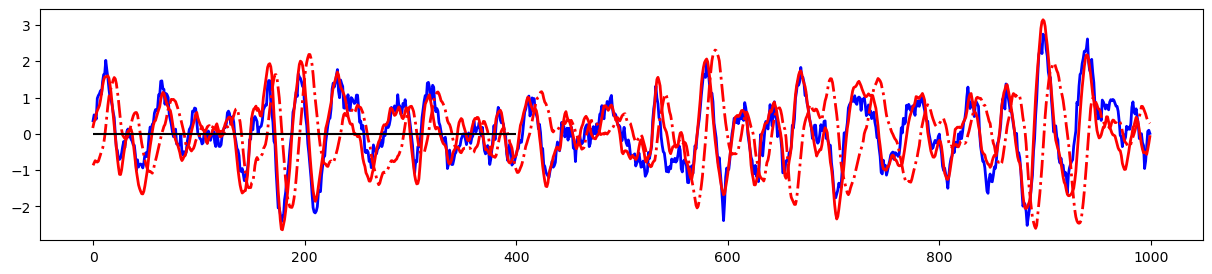

In [24]:
plt.figure(figsize=(15, 3))
plt.plot(pred[0][:1000,1], label=label_box[0], color='b', linewidth=2)
plt.plot(sup[0][:1000,1], label='sup', color='r', linewidth=2)
plt.plot(sup[0][:1000,0], label='sup', linestyle='-.',color='r', linewidth=2)
plt.hlines(0,0,400, color='k')

### 振幅ごとのリードタイムの比較

In [13]:
# 通年データに対するスキルの比較
init_amp = np.sqrt(sup[0,0,:,0]**2 + sup[0,0,:,1]**2)
print(init_amp.shape)
idx1 = np.where(init_amp >= 1)[0]
idx2 = np.where(init_amp < 1)[0]
str_amp = init_amp[idx1]
weak_amp = init_amp[idx2]
print(str_amp.shape)

pred_str = pred[:,:,idx1,:]
sup_str = sup[:,:,idx1,:]
pred_weak = pred[:,:,idx2,:]
sup_weak = sup[:,:,idx2,:]
print(pred_str.shape)
cor_str = np.zeros(lt_max+1)
cor_weak = np.zeros(lt_max+1)
for i in range(len(pred)):
    cor_str[i] = culc_cor(sup_str[i,0], pred_str[i,0])
    cor_weak[i] = culc_cor(sup_weak[i,0], pred_weak[i,0])
print(cor_str)
print(cor_weak)

(2520,)
(1345,)
(36, 20, 1345, 2)
[ 9.96240029e-01  9.94934440e-01  9.91559135e-01  9.85720436e-01
  9.74458098e-01  9.70423129e-01  9.61191569e-01  9.44579971e-01
  9.30236317e-01  6.86063271e-01  6.79884038e-01  6.61942631e-01
  6.36299027e-01  6.17101241e-01  6.27720918e-03  6.19458737e-03
 -1.96379828e-03  2.47788676e-03 -2.86387067e-04 -3.22031185e-03
  4.78328196e-01  4.55800964e-01 -8.61125777e-03 -1.15063374e-02
  1.47366010e-02  7.38868726e-04 -8.51855078e-03 -3.57871867e-02
 -3.77277296e-02 -8.50363895e-03 -3.93114411e-02  5.01367183e-02
 -4.70591298e-02  4.71695027e-02 -1.71879233e-03  3.25829333e-02]
[ 9.85087746e-01  9.66566736e-01  9.53993641e-01  9.32731107e-01
  8.95346934e-01  8.90039605e-01  8.52279840e-01  8.09299305e-01
  7.84222981e-01  5.79908563e-01  5.65741528e-01  5.32920354e-01
  4.83223760e-01  4.68213275e-01 -1.82136836e-02 -1.76173057e-02
  1.30933864e-02 -2.82406236e-03  7.53637098e-04  5.36016070e-03
  3.04798192e-01  2.52846734e-01  1.33216141e-02  1.659

In [35]:
# JJAデータに対するスキルの比較
jja = rt.month.isin([6, 7, 8])
#esm_jja_mean = pred[:,jja,:]
sup_jja = sup[:,:,jja,:]
init_amp_jja = np.sqrt(sup_jja[0,0,:,0]**2 + sup_jja[0,0,:,1]**2)
print(init_amp_jja.shape)
idx_jja1 = np.where(init_amp_jja >= 1)[0]
idx_jja2 = np.where(init_amp_jja < 1)[0]
str_amp_jja = init_amp_jja[idx_jja1]
weak_amp_jja = init_amp_jja[idx_jja2]
print(str_amp_jja.shape)

pred_str_jja = esm_jja_mean[:,idx_jja1,:]   
sup_str_jja = sup_jja[:,0,idx_jja1,:]
pred_weak_jja = esm_jja_mean[:,idx_jja2,:]
sup_weak_jja = sup_jja[:,0,idx_jja2,:]
print(pred_str_jja.shape)
cor_str_jja = np.zeros(lt_max+1)
cor_weak_jja = np.zeros(lt_max+1)
for i in range(len(pred)):
    cor_str_jja[i] = culc_cor(sup_str_jja[i], pred_str_jja[i])    
    cor_weak_jja[i] = culc_cor(sup_weak_jja[i], pred_weak_jja[i])   
print(cor_str_jja)
print(cor_weak_jja)

(644,)
(430,)
(36, 430, 2)
[0.99902552 0.9976866  0.99483818 0.99106662 0.98556808 0.98140776
 0.97207803 0.96035608 0.94952938 0.93586016 0.91928436 0.90352834
 0.87257216 0.84880344 0.82881455 0.80728357 0.79308402 0.78610889
 0.76910333 0.75875633 0.74798605 0.72947609 0.71515576 0.69452703
 0.69465008 0.66671686 0.6374321  0.58057231 0.56558199 0.57180434
 0.54217932 0.50157043 0.48594211 0.44105801 0.41755647 0.38575088]
[0.99173936 0.98407197 0.96657963 0.95012277 0.93240446 0.91930954
 0.89816462 0.87739683 0.85659817 0.84965011 0.81694687 0.8004086
 0.76515092 0.75671642 0.71932894 0.69481181 0.69294914 0.64166163
 0.65378933 0.61814558 0.61401598 0.59859154 0.56930892 0.56530908
 0.54737006 0.57014551 0.55467402 0.53159311 0.51373766 0.45871499
 0.45258952 0.45302471 0.39562633 0.47488302 0.41073152 0.44679334]


In [65]:
best_val_cor = np.array([[0.96708369, 0.94710881, 0.87744948, 0.77453314, 0.70452758],
                         [0.99809069, 0.97344685, 0.90183529, 0.78562904, 0.70218686],
                         [0.99823431, 0.97029559, 0.90100883, 0.7644629,  0.67950856]])

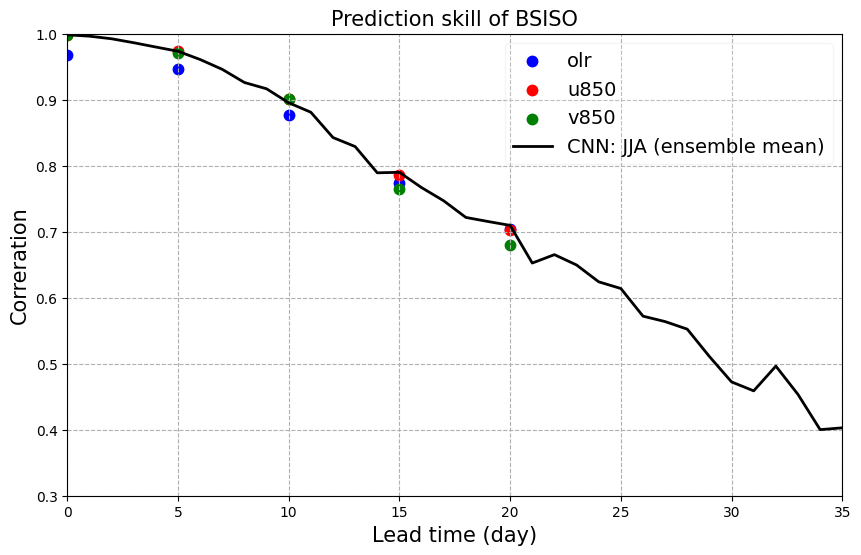

In [66]:
# リードタイムごとの予測スキルの比較
label_box = ['CNN: JJA', 'CNN: DJF', 'CNN: mjjaso', 'CNN: ndjfma', 'CNN: All Period']
lead_time = np.arange(0, 21, 5)
lt2 = np.arange(0, 36) 
plt.figure(figsize=(10,6))
# cnn model

plt.scatter(lead_time, best_val_cor[0], label=val_box[0], color='b', linewidth=2.5)
plt.scatter(lead_time, best_val_cor[1], label=val_box[1], color='r', linewidth=2.5)
plt.scatter(lead_time, best_val_cor[2], label=val_box[2], color='g', linewidth=2.5)

# 先行研究の結果の比較
#plt.plot(cnn_bp[:,0], cnn_bp[:,1], label='CNN: Band Pass', color='r', linestyle='--', alpha=0.7, linewidth=2)

plt.plot(lt2, best_cor_jja, label='CNN: JJA', color='k', linestyle='-', linewidth=2)
plt.xlim(0,35)
plt.ylim(0.3,1.0)
plt.xlabel('Lead time (day)', fontsize=15)
plt.ylabel('Correration', fontsize=15)
plt.title('Prediction skill of BSISO', fontsize=15)
plt.grid(linestyle='--')    
# legend で透過度を指定
plt.legend(fontsize=14, framealpha=0.2)

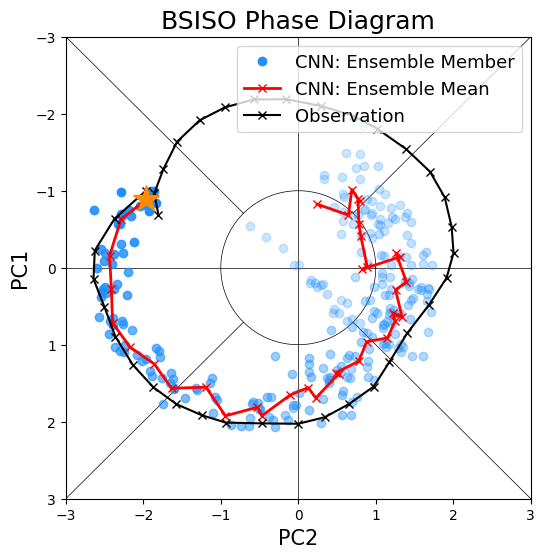

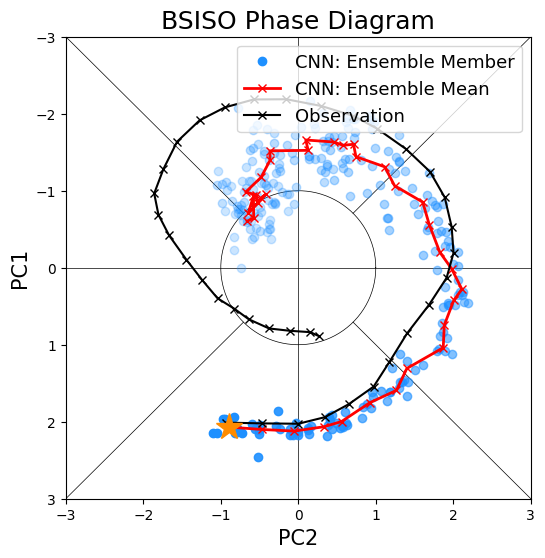

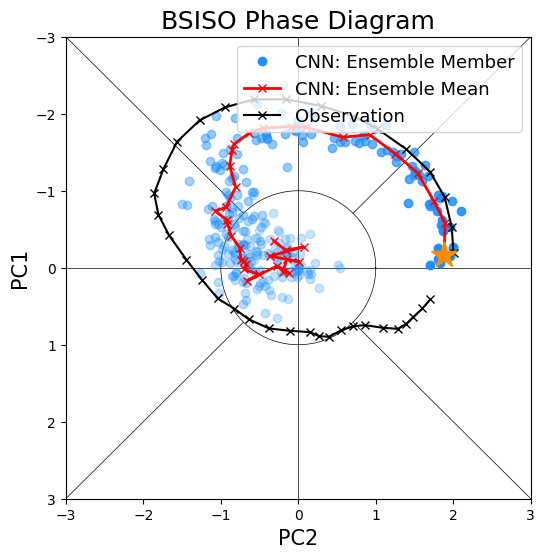

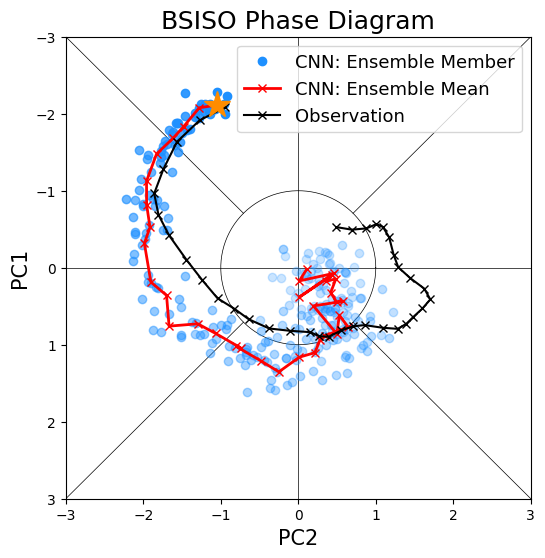

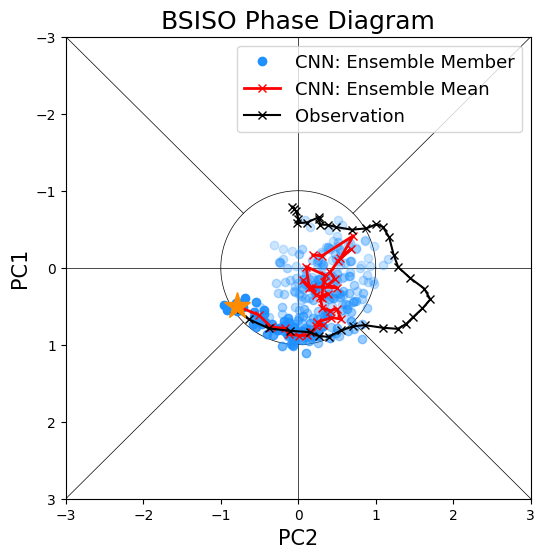

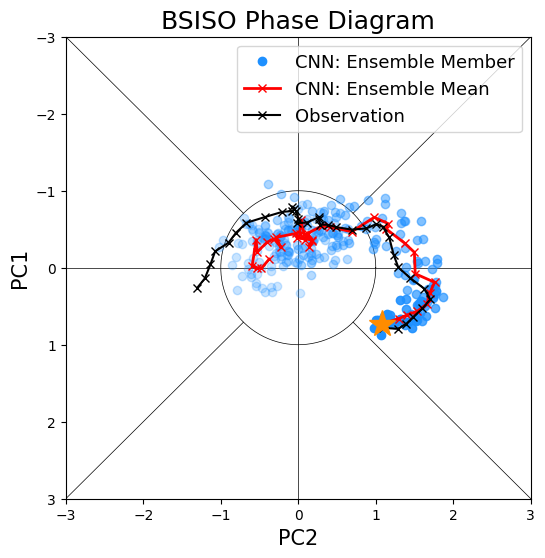

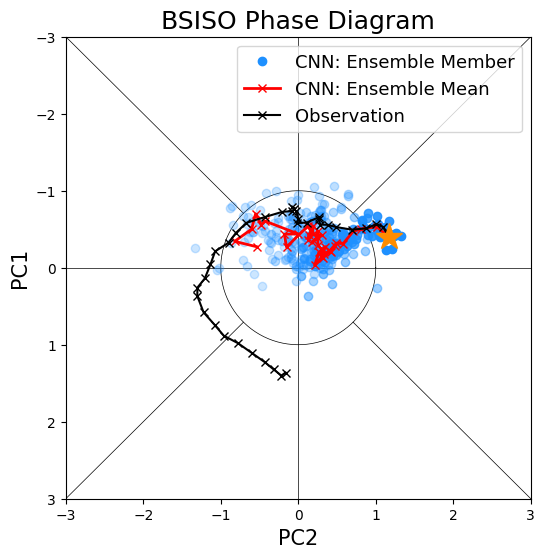

In [15]:
start = 140
stop  = 170
for stop in range(25, 88, 10):
    plt.figure(figsize=(6,6))
    # r = 1 の円
    theta = np.linspace(0, 2*np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    plt.plot(x, y, 'k', linewidth=0.5)
    # 中心線
    plt.hlines(0, -3, 3, 'k', linewidth=0.5)
    plt.vlines(0, -3, 3, 'k', linewidth=0.5)
    # 斜線
    plt.plot([-3, -np.sqrt(2)/2], [-3, -np.sqrt(2)/2], 'k', linewidth=0.5)
    plt.plot([np.sqrt(2)/2, 3], [np.sqrt(2)/2, 3], 'k', linewidth=0.5)
    plt.plot([-3, -np.sqrt(2)/2], [3, np.sqrt(2)/2], 'k', linewidth=0.5)
    plt.plot([np.sqrt(2)/2, 3], [-np.sqrt(2)/2, -3], 'k', linewidth=0.5)

    lt = np.arange(36)
    #label_box = [f'{i}day' for i in range(0,36,5)]
    label_box = np.arange(0,36,5)
    cmap = plt.get_cmap('winter')
    for tt in range(36):
        if tt == 0:
            #plt.scatter(esm_jja[tt,:,stop,1], -esm_jja[tt,:,stop,0], c=cmap(float(tt)/36), marker='o', label='CNN: Ensemble Member', alpha=0.5)
            plt.plot(esm_jja[tt,:,stop,1], -esm_jja[tt,:,stop,0], 'o', color='dodgerblue', label='CNN: Ensemble Member', alpha=1/(tt*.1+1))
        else:
            #plt.scatter(esm_jja[tt,:,stop,1], -esm_jja[tt,:,stop,0], c=cmap(float(tt)/36), marker='o', alpha=0.5)
            plt.plot(esm_jja[tt,:,stop,1], -esm_jja[tt,:,stop,0], 'o', color='dodgerblue',  alpha=1/(tt*.1+1))
    plt.plot(esm_jja_mean[lt,stop,1], -esm_jja_mean[lt,stop,0], 'x', color='r', linestyle='-', linewidth=2., label='CNN: Ensemble Mean')
    plt.plot(sup_jja[lt,0,stop,1], -sup_jja[lt,0,stop,0], 'x', color='k', linestyle='-', label='Observation')
    plt.plot(esm_jja_mean[0,stop,1], -esm_jja_mean[0,stop,0], '*', markersize=20,color='darkorange')
    #plt.plot(sup_jja[0,0,stop+35,1], sup_jja[0,0,start:stop+35,0], 'x',color='b', linestyle='-', label='observation')
    #for tt, label in enumerate(label_box):
    #    plt.annotate(label, (esm_jja_mean[tt*5,stop,1], esm_jja_mean[tt*5,stop,0]), fontsize=15,)
    plt.xlabel('PC2', fontsize=15)
    plt.ylabel('PC1', fontsize=15)
    plt.title('BSISO Phase Diagram', fontsize=18)
    plt.xlim(-3, 3)
    plt.ylim(3, -3)

    plt.legend(fontsize=13, loc='upper right')

(-3.0, 3.0)

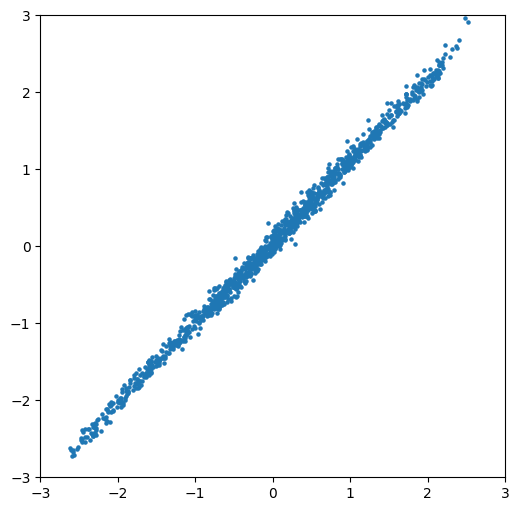

In [148]:
# 散布図
plt.figure(figsize=(6,6))
plt.scatter(pred_jja[0,0,:,:], sup_jja[0,0,:,:], 5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)